In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats


In [8]:
from PyEyeSim import pyeyesim as pysim


In [3]:
#from PyEyeSim import pyeyesim_func_obj as pysim_o


In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
MemoryStudy=0
GenderStudy=1
Mac=0  # set to 1 for macbook path, 0 for PC path
if GenderStudy:
    if Mac:
        Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIFemalePaint.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderIIFemalePaint.csv'
    sizeX=2560
    sizeY=1600
     #StimN='Pa'
if MemoryStudy:
    if Mac:
        Filepath='/Users/jarato/Documents/EyeTracking/MemoryStudyFix.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Documents\\EyeTracking\\WilmKonigDatabase\\MemoryStudyFix.csv'
    sizeX=1280
    sizeY=960


FixData=pd.read_csv(Filepath)
if MemoryStudy:
    FixData=FixData[FixData['Repetition']==1]
   # StimN='Stimulus'


#
#fixData=pd.read_csv(Filepath)
FixData

,Unnamed: 0,Unnamed: 0.1,subjectID,Number,GazePoints,mean_x,mean_y,radius,Cluster,Painting,PartGend,Gaze Points,Radius
0,0,0,G_001,1.0,30.0,1231.0,860.0,19.9396,0.0,Bellini_Halbakt,Male,NaN,NaN
1,1,1,G_001,2.0,13.0,1242.0,412.0,25.8158,0.0,Bellini_Halbakt,Male,NaN,NaN
2,2,2,G_001,3.0,20.0,1255.0,419.0,37.4225,0.0,Bellini_Halbakt,Male,NaN,NaN
3,3,3,G_001,4.0,31.0,1270.0,440.0,25.6350,0.0,Bellini_Halbakt,Male,NaN,NaN
4,4,4,G_001,5.0,48.0,1045.0,751.0,37.7525,0.0,Bellini_Halbakt,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51610,28411,3714,P74_VF,74.0,36.0,823.0,656.0,23.1638,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51611,28412,3715,P74_VF,75.0,22.0,850.0,658.0,20.8895,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51612,28413,3716,P74_VF,76.0,14.0,828.0,668.0,27.6424,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51613,28414,3717,P74_VF,77.0,17.0,825.0,659.0,28.2337,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN


### load dataset

In [22]:
MyDat=pysim.EyeData('GenderStudy','Within',FixData,sizeX,sizeY)

Fixation dataset GenderStudy
dataset size:  (51615, 13)
study design:  Within
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as .DataInfo(StimName='YourColumn') default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y


### provide missing column name and stimulus path information

In [23]:
Path='C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Female Paintings\\'

MyDat.DataInfo(StimName='Painting',StimPath=Path,StimExt='.jpg')

info found for 56 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images


### descriptive stats on group

Data for  56 observers and  12  stimuli.
Mean fixation number:  76.81  +/-  11.44
fixation duration not asked for
Num of trials with zero fixations: 1
Num valid trials  671
Mean X location:  1302.5  +/-  53.0  pixels
Mean Y location:  771.5  +/-  78.3  pixels
Mean saccade  amplitude:  184.9  +/-  36.5  pixels
Mean scanpath  length:  13701.6  +/-  2165.0  pixels


(array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
        'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
        'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
        'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
        'Wittmann_Selbstbildnis'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P74_VF', 'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF',
        'P87_VF'], dtype=object))

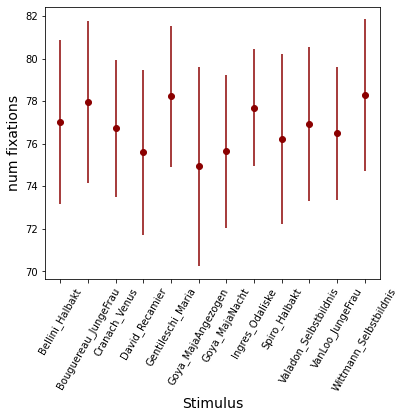

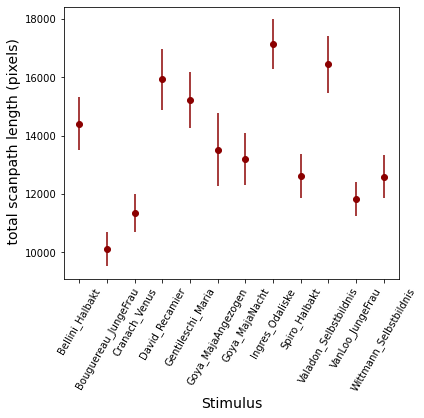

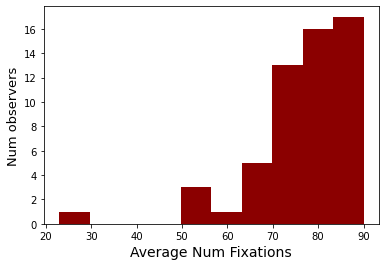

In [25]:
MyDat.RunDescriptiveFix(Visual=1,duration=0)

## run group fixation descriptive comparison

Conditions ['Female' 'Male']
Calculating entropy
0 Bellini_Halbakt 5.65 maximum entropy 6.93
1 Bouguereau_JungeFrau 5.09 maximum entropy 5.97
2 Cranach_Venus 5.24 maximum entropy 6.27
3 David_Recamier 5.62 maximum entropy 6.93
4 Gentileschi_Maria 5.91 maximum entropy 6.97


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


5 Goya_MajaAngezogen 5.51 maximum entropy 7.0
6 Goya_MajaNacht 5.5 maximum entropy 6.9
7 Ingres_Odaliske 6.12 maximum entropy 7.15
8 Spiro_Halbakt 5.47 maximum entropy 6.41
9 Valadon_Selbstbildnis 5.92 maximum entropy 7.12
10 VanLoo_JungeFrau 5.57 maximum entropy 6.34
11 Wittmann_Selbstbildnis 5.47 maximum entropy 6.38
0 Female Num fix=  77.39 +/- 13.25
0 Female Entropy=  3.67 +/- 0.24
0 Female tot scanpath len =  13882.11 +/- 2145.62
0 Female saccade amplitude =  187.52 +/- 41.26
1 Male Num fix=  76.26 +/- 9.41
1 Male Entropy=  3.65 +/- 0.16
1 Male tot scanpath len =  13533.6 +/- 2169.36
1 Male saccade amplitude =  182.49 +/- 31.24
 
Overall group differences: 
Entropy t= 0.3398  p  0.7354
Num Fix t= 0.3623  p  0.7185
Scanpath lengths 0.593  p  0.5556
Saccade amplitudes t= 0.508  p  0.6135


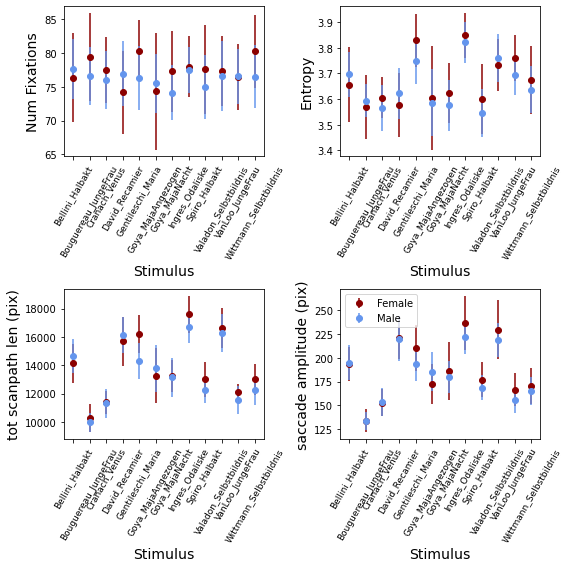

In [34]:
MyDat.CompareGroupsFix('PartGend')

In [32]:
np.nanmean(MyDat.len_scanpath,1)

array([13664.7939688 , 16470.65826938, 14333.96944592, 12165.85898216,
       18020.91772895, 12914.75927173, 12587.96950682, 16150.66884273,
       12912.06810292, 13667.54921546,  9512.8641181 , 14217.83645898,
       14747.62406431, 17518.73459432, 14754.41073425, 12914.57404996,
       14601.54643863, 13943.91325458, 15604.31031048, 11680.26976504,
       14511.04937365,  9440.52050112, 14198.92066081, 14387.43835387,
       13908.73613373, 16013.89831577, 13446.08266263, 11140.512253  ,
       14959.3887355 , 13362.86030677, 11709.18238251,  8173.55475178,
       11239.47903476, 12489.37156473, 15693.7229139 , 14392.67851406,
       12225.47937928, 15094.22195719, 16930.6607722 , 13474.21545575,
       15846.49850588, 12201.56581283, 13106.19071257, 17465.55445191,
       15021.04892134, 12377.39513466,  9992.60864148, 11420.66212093,
       13688.64177348, 13673.13996588, 14464.40081913,  9046.93279686,
       13145.71513691, 16137.04830366, 13073.11111565, 17453.34730206])

In [16]:
np.shape(MyDat.entropies_ind)

(56, 12)

In [38]:
MyDat.NFix.to_pandas().to_csv('C:\\Users\\aratoj87\\Documents\\ArtHistory\\NumFix.csv')

In [18]:
FixCountInd=MyDat.FixCountCalc('Bellini_Halbakt')


In [33]:
MyDat.Conds

array(['Female', 'Male'], dtype=object)

In [56]:
MyDat.GetStimuli('C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Female Paintings\\')

Conditions ['Female' 'Male']


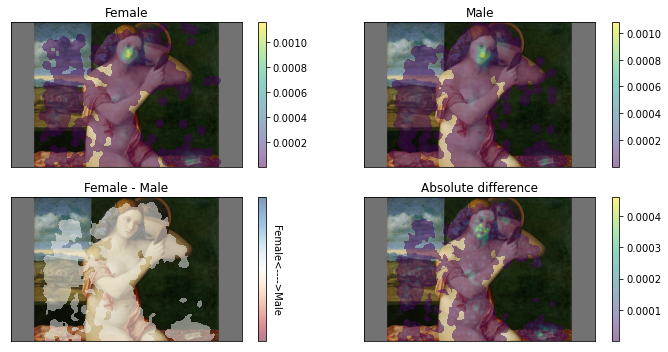

In [88]:
MyDat.CompareGroupsHeatMap(Stim='Bellini_Halbakt',betwcond='PartGend',SD=15)

Conditions ['Female' 'Male']


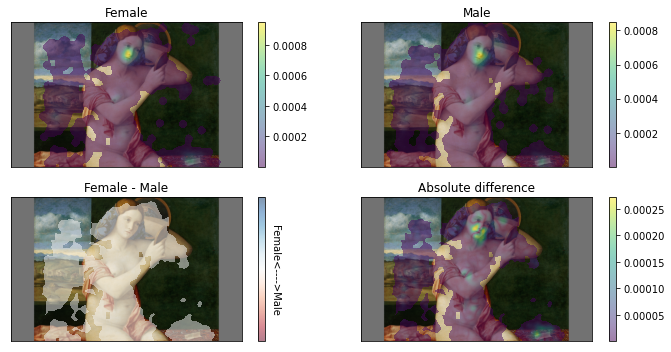

In [83]:
MyDat.CompareGroupsHeatMap(Stim='Bellini_Halbakt',betwcond='PartGend')

In [70]:
hasattr(MyDat.Stims)

TypeError: hasattr expected 2 arguments, got 1

In [169]:
np.shape(MyDat.BinnedCount(np.sum(MyDat.FixCountInd,0),'Bellini_Halbakt'))

(31, 51)

In [8]:
MyDat.BinnedCount(np.sum(MyDat.FixCountInd,0),'Bellini_Halbakt')

NameError: name 'MyDat' is not defined

In [49]:
for i in range(10):
    print(np.sum(MyDat.fixcounts[i]))

4233.0
4356.0
4225.0
4229.0
4369.0
4185.0
4223.0
4304.0
4187.0
4188.0


In [42]:
MyDat.stimuli

array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
       'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
       'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
       'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
       'Wittmann_Selbstbildnis'], dtype=object)

In [51]:
fixcounts={}
for ci,i in enumerate(MyDat.stimuli):
        fixcounts[i]=[]

In [53]:
fixcounts['Bellini_Halbakt']

[]

### Heatmap

In [13]:
MyDat.Heatmap('Bellini_Halbakt',SD=50,Vis=1)

AttributeError: 'EyeData' object has no attribute 'NS'